<a href="https://colab.research.google.com/github/pedrohortencio/machine-learning-gladiator/blob/main/MNIST/MNIST_Gladiator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing packages and libraries

In [11]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [12]:
# Scikit-Learn tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Declaring a dictionary that will hold the accuracy values for the models
dict_acc = {}

In [3]:
!pip install -q kaggle

In [4]:
# changes the directory in which the kaggle.json file is stored
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [5]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 24.7MB/s]
100% 9.16M/9.16M [00:00<00:00, 36.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.8MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 95.7MB/s]


##Dataframe creation

In [6]:
# Creating train and test dataframes from the dataset
df_train = pd.read_csv('/content/train.csv.zip', compression='zip', 
                        header=0, sep=',', quotechar='"')
df_test = pd.read_csv('/content/test.csv.zip', compression='zip', 
                       header=0, sep=',', quotechar='"')

In [7]:
df_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


## Creating the train and test datasets

In [13]:
y = df_train['label'].to_numpy()   #creates a ndarray containing the training labels

df_train = df_train.drop('label', axis=1) # drops tha label column from the training dataframe

# Creating NumPy arrays for both test and train images
X = df_train.to_numpy()
X_test = df_test.to_numpy()

# Scaling the images, so all the values are in a 0-1 interval
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Splitting the data
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X, y, random_state=0)

In [14]:
# As there are multiple models, I'll work on only a part of the dataset, to speed up the training
print("Original Shapes")
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

X_train = X_train[:5000]    # selects only 5000 images for training
y_train = y_train[:5000]
X_validation = X_validation[:2000]  # and 2000 for validation
y_validation = y_validation[:2000]

print()
print("Shapes after selecting only a subset of the images")
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

Original Shapes
(31500, 784)
(31500,)
(10500, 784)
(10500,)

Shapes after selecting only a subset of the images
(5000, 784)
(5000,)
(2000, 784)
(2000,)


### Visualizing the images in the dataset

In [ ]:
# Transforming the data from dataframe to ndarray
X_visu = df_train.to_numpy()
print(X_visu.shape)
X_visu

(42000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

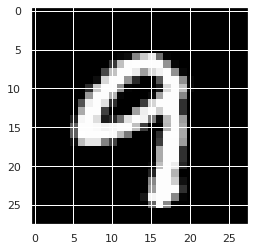

In [ ]:
plt.imshow(X_visu[9238].reshape(28,28), cmap='gray')    # reshapes the image in the 9238 position

Grid visualization

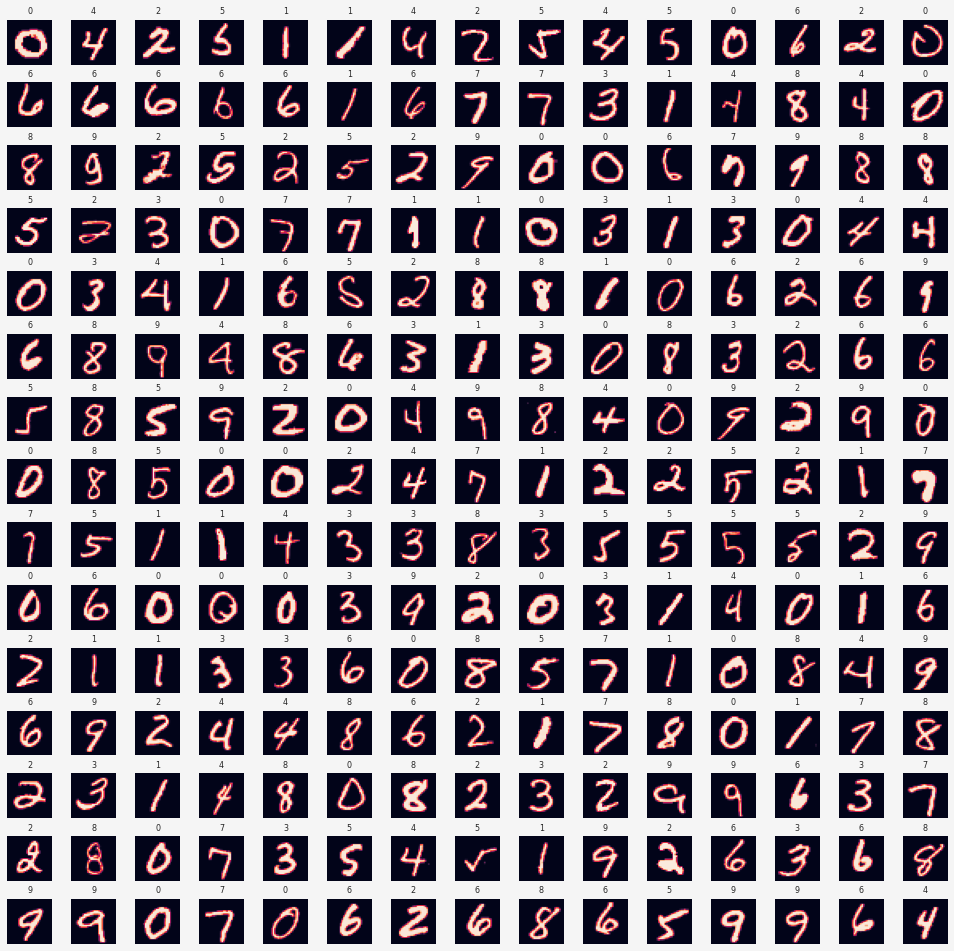

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

fig.patch.set_facecolor('whitesmoke')

axes = axes.ravel()

n_training = len(X_visu) 

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
    axes[i].imshow(X_visu[index].reshape(28,28))
    axes[i].set_title(y[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Creating Models

### Support Vector Classifier

In [15]:
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score

In [16]:
# Creates and fits the model
svc_model = SVC(decision_function_shape='ovo', cache_size=4000)
svc_model.fit(X_train, y_train)

# Stores the predictions
predictions_svc = svc_model.predict(X_validation)

# Creates several metrics
recall_svc = recall_score(y_validation, predictions_svc, average='macro')
precision_svc = precision_score(y_validation, predictions_svc, average='macro')
f1_svc = f1_score(y_validation, predictions_svc, average='macro')
acc_svc = accuracy_score(y_validation, predictions_svc)
bacc_svc = balanced_accuracy_score(y_validation, predictions_svc)

# Stores the accuracy in the dictionary created early
dict_acc['SVC'] = acc_svc

print('Recall Score:', recall_svc)
print('Precision Score:', precision_svc)
print('F1 Score:', f1_svc)
print('Accuracy Score:', acc_svc)
print('Balanced Accuracy Score:', bacc_svc)

Recall Score: 0.9489558891865707
Precision Score: 0.9495145805326499
F1 Score: 0.949110981652216
Accuracy Score: 0.9495
Balanced Accuracy Score: 0.9489558891865707


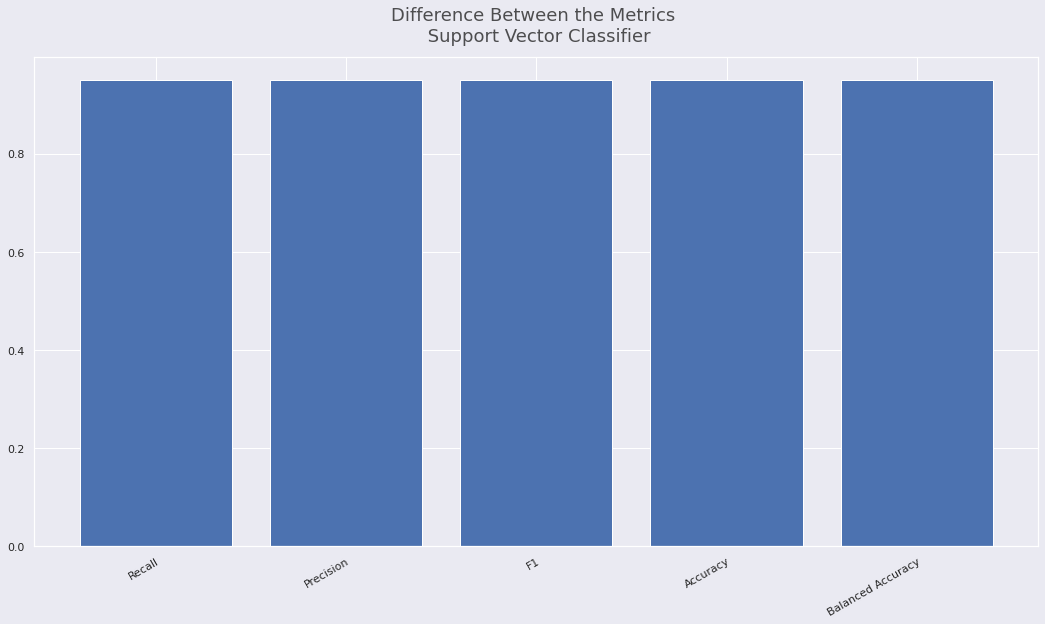

In [17]:
# Plotting the metrics for the SVC model

fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor('#eaeaf2')

plt.bar(['Recall', 'Precision', 'F1', 'Accuracy', 'Balanced Accuracy'], 
        [recall_svc, precision_svc, f1_svc, acc_svc, bacc_svc])
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')

plt.title('Difference Between the Metrics \n Support Vector Classifier',
          size=18, alpha=0.8, y=1.02)
plt.show();

As the classes are all well balanced, these metrics will be pratically the same. Because of that, I'll only use Accuracy for the comparisons.

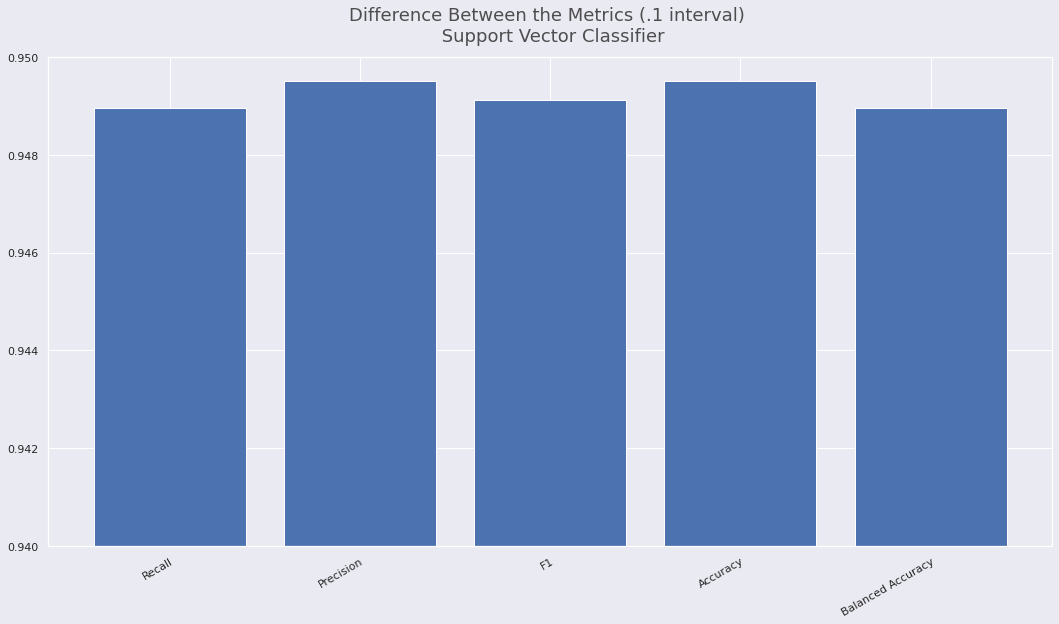

In [18]:
fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor('#eaeaf2')

plt.bar(['Recall', 'Precision', 'F1', 'Accuracy', 'Balanced Accuracy'], 
        [recall_svc, precision_svc, f1_svc, acc_svc, bacc_svc])
plt.ylim([0.94, 0.95])
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')

plt.title('Difference Between the Metrics (.1 interval) \n Support Vector Classifier',
          size=18, alpha=0.8, y=1.02)
plt.show();

### K-Neighbors Classifier

In [19]:
# Creates and fits the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Makes the predicitons
predictions_knn = knn.predict(X_validation)
acc_knn = accuracy_score(y_validation, predictions_knn)

# Stores the predictions in the dict
dict_acc['kNN'] = acc_knn
print('Accuracy Score:', acc_knn)

Accuracy Score: 0.9325


###Logistic Regression

In [20]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

predictions_logreg = logreg.predict(X_validation)
acc_logreg = accuracy_score(y_validation, predictions_logreg)

dict_acc['LogisticRegression'] = acc_logreg
print('Accuracy Score:', acc_logreg)

Accuracy Score: 0.8965


### Ridge Classifier

In [21]:
rdg = RidgeClassifier()
rdg.fit(X_train, y_train)

predictions_rdg = rdg.predict(X_validation)
acc_rdg = accuracy_score(y_validation, predictions_rdg)

dict_acc['RidgeClassifier'] = acc_rdg
print('Accuracy Score:', acc_rdg)

Accuracy Score: 0.826


###Ridge Classifier CV

In [22]:
rdgCV = RidgeClassifierCV()
rdgCV.fit(X_train, y_train)

predictions_rdgCV = rdgCV.predict(X_validation)
acc_rdgCV = accuracy_score(y_validation, predictions_rdgCV)

dict_acc['RidgeClassifierCV'] = acc_rdgCV
print('Accuracy Score:', acc_rdgCV)

Accuracy Score: 0.835


### Perceptron Classifier

In [23]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

predictions_perceptron = perceptron.predict(X_validation)
acc_perceptron = accuracy_score(y_validation, predictions_perceptron)

dict_acc['Perceptron'] = acc_perceptron
print('Accuracy Score:', acc_perceptron)

Accuracy Score: 0.867


###MLP Classifier

In [24]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

predictions_mlp = mlp.predict(X_validation)
acc_mlp = accuracy_score(y_validation, predictions_mlp)

dict_acc['MLP Classifier'] = acc_mlp
print('Accuracy Score:', acc_mlp)

Accuracy Score: 0.932


### Naive Bayes - Bernoulli

In [25]:
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)

predictions_bnl = bernoulli.predict(X_validation)
acc_bnl = accuracy_score(y_validation, predictions_bnl)

dict_acc['Bernoulli Naive Bayes'] = acc_bnl
print('Accuracy Score:', acc_bnl)

Accuracy Score: 0.8275


###Naive Bayes - Gaussian

In [26]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

predictions_gaussian = gaussian.predict(X_validation)
acc_gaussian = accuracy_score(y_validation, predictions_gaussian)

dict_acc['Gaussian Naive Bayes'] = acc_gaussian
print('Accuracy Score:', acc_gaussian)

Accuracy Score: 0.556


### Decision Tree

In [27]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

predictions_tree = tree.predict(X_validation)
acc_tree = accuracy_score(y_validation, predictions_tree)

dict_acc['Decision Tree'] = acc_tree
print('Accuracy Score:', acc_tree)

Accuracy Score: 0.7675


### Random Forest

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predictions_rf = rf.predict(X_validation)
acc_rf = accuracy_score(y_validation, predictions_rf)

dict_acc['Random Forest'] = acc_rf
print('Accuracy Score:', acc_rf)

Accuracy Score: 0.9405


### Gradient Boosting Classifier

In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

predictions_gbc = gbc.predict(X_validation)
acc_gbc = accuracy_score(y_validation, predictions_gbc)

dict_acc['GradientBoosting Classifier'] = acc_gbc
print('Accuracy Score:', acc_gbc)

Accuracy Score: 0.915


## Plotting

In [30]:
dict_acc

{'Bernoulli Naive Bayes': 0.8275,
 'Decision Tree': 0.7675,
 'Gaussian Naive Bayes': 0.556,
 'GradientBoosting Classifier': 0.915,
 'LogisticRegression': 0.8965,
 'MLP Classifier': 0.932,
 'Perceptron': 0.867,
 'Random Forest': 0.9405,
 'RidgeClassifier': 0.826,
 'RidgeClassifierCV': 0.835,
 'SVC': 0.9495,
 'kNN': 0.9325}

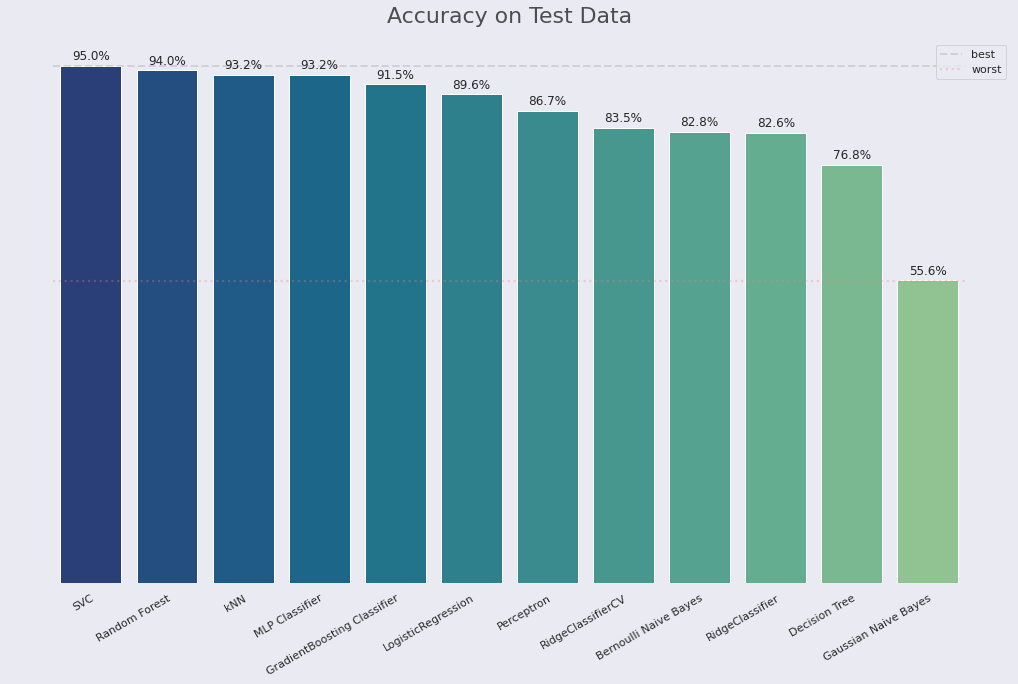

In [70]:
fig = plt.figure(figsize=(18,10))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()  # create an axes
width = 0.35

# The plot (barplot) is created and stored in the rects1 variable
rects1 = ax.bar(*zip(*sorted(dict_acc.items(), key=lambda x: x[1], reverse=True)), color = sns.color_palette("crest_r", n_colors=12))

# For every bar in the plot
for r1 in rects1.patches:
    #get the height
    h1 = r1.get_height()
    
    # create a percentage
    percent = h1*100#int(h1)
    
    # and annotate the perceentage number on top of the bar
    ax.annotate('{:.1f}%'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate the X labels (models' names)
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')
plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks

#print(*ax.get_xlim())  # gives the x limits

# setting two horizontal lines in the best and worst algorithms
plt.hlines(0.948, -0.5, 11.5, color='dimgray', linestyles='--', lw=2, alpha=0.2, label='best')
plt.hlines(0.554, -0.5, 11.5, color='lightcoral', linestyles='dotted', lw=2.2, alpha=0.3, label='worst')

# creating a title
plt.title('Accuracy on Test Data',
          size=22, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend()

# saves the plot
plt.savefig("Accuracy-test.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();

## Fine Tuning

Grid Search the models

In [ ]:
bkp_dict_acc = dict_acc # as I'll modify the dict_acc, I'm creating a backup of it

In [60]:
df_acc = pd.Series(bkp_dict_acc)    # creating a series
df_acc = df_acc.to_frame()  # converting it to a dataframe
df_acc.rename({0:'Accuracy'}, axis=1, inplace=True) # renaming the column
df_acc['Accuracy (Fine-Tuned)'] = np.nan    # creating a new column with NaN values
df_acc

,Accuracy,Accuracy (Fine-Tuned)
SVC,0.9495,NaN
kNN,0.9325,NaN
LogisticRegression,0.8965,NaN
RidgeClassifier,0.8260,NaN
RidgeClassifierCV,0.8350,NaN
Perceptron,0.8670,NaN
MLP Classifier,0.9320,NaN
Bernoulli Naive Bayes,0.8275,NaN
Gaussian Naive Bayes,0.5560,NaN
Decision Tree,0.7675,NaN


In [59]:
df_acc.loc[df_acc.index == 'Random Forest', 'Accuracy (Fine-Tuned)'] = 0
df_acc

,Accuracy,Accuracy (Fine-Tuned)
SVC,0.9495,NaN
kNN,0.9325,NaN
LogisticRegression,0.8965,NaN
RidgeClassifier,0.8260,NaN
RidgeClassifierCV,0.8350,NaN
Perceptron,0.8670,NaN
MLP Classifier,0.9320,NaN
Bernoulli Naive Bayes,0.8275,NaN
Gaussian Naive Bayes,0.5560,NaN
Decision Tree,0.7675,NaN


### SVC

In [ ]:
# Grid search to find better parameters
parameter = [{'C':[3, 5, 50],
              'cache_size':[4000],
              'decision_function_shape':['ovo']}]

classifier = GridSearchCV(SVC(), parameter, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)

print(classifier.best_score_)

{'C': 3, 'cache_size': 4000, 'decision_function_shape': 'ovo'}
0.9549999999999998


In [62]:
# Recreates the model with the new parameters
svc_ft = SVC(C=3, cache_size=4000, decision_function_shape='ovo')
svc_ft.fit(X_train, y_train)

predictions_svc = svc_ft.predict(X_validation)
acc_svc = accuracy_score(y_validation, predictions_svc)

# Adds the result in the 'Accuracy (Fine-Tuned)' column
df_acc.loc[df_acc.index == 'SVC', 'Accuracy (Fine-Tuned)'] = acc_svc

print('Accuracy Score:', acc_svc)

Accuracy Score: 0.9565


### Random Forest

In [ ]:
parameter = [{'n_estimators':[100, 200, 500],
              'criterion':['gini', 'entropy']}]

classifier = GridSearchCV(RandomForestClassifier(), parameter, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)

print(classifier.best_score_)

{'criterion': 'gini', 'n_estimators': 500}
0.9305999999999999


In [63]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

predictions_rf = rf.predict(X_validation)
acc_rf = accuracy_score(y_validation, predictions_rf)

df_acc.loc[df_acc.index == 'Random Forest', 'Accuracy (Fine-Tuned)'] = acc_rf

print('Accuracy Score:', acc_rf)

Accuracy Score: 0.9455


### MLP Classifier

In [ ]:
parameter = [{'hidden_layer_sizes':[100, 200, 500],
              'max_iter':[100, 200]}]

classifier = GridSearchCV(MLPClassifier(), parameter, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)
print(classifier.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': 500, 'max_iter': 100}
0.9374


In [64]:
mlp = MLPClassifier(hidden_layer_sizes=500, max_iter=200)
mlp.fit(X_train, y_train)

predictions_mlp = mlp.predict(X_validation)
acc_mlp = accuracy_score(y_validation, predictions_mlp)

df_acc.loc[df_acc.index == 'MLP Classifier', 'Accuracy (Fine-Tuned)'] = acc_mlp
print('Accuracy Score:', acc_mlp)

Accuracy Score: 0.948


###kNN

In [69]:
parameter = [{'n_neighbors':[3, 5, 7],
              'weights':['uniform', 'distance'],
              'metric':['minkowski', 'manhattan']}]

classifier = GridSearchCV(KNeighborsClassifier(), parameter, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)
print(classifier.best_score_)

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
0.9294


In [73]:
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

predictions_knn = knn.predict(X_validation)
acc_knn = accuracy_score(y_validation, predictions_knn)

df_acc.loc[df_acc.index == 'kNN', 'Accuracy (Fine-Tuned)'] = acc_knn

print('Accuracy Score:', acc_knn)

Accuracy Score: 0.939


### Logistic Regression

In [72]:
# I'm kinda curious to see how good a linear model can be
parameter = [{'C':[0.8, 1],
              'solver':['liblinear', 'lbfgs', 'saga'],
              'max_iter':[1000]}]

classifier = GridSearchCV(LogisticRegression(), parameter, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)
print(classifier.best_score_)

{'C': 0.8, 'max_iter': 1000, 'solver': 'lbfgs'}
0.8846


In [74]:
logreg = LogisticRegression(C= 0.8, max_iter=2000)
logreg.fit(X_train, y_train)

predictions_logreg = logreg.predict(X_validation)
acc_logreg = accuracy_score(y_validation, predictions_logreg)

df_acc.loc[df_acc.index == 'LogisticRegression', 'Accuracy (Fine-Tuned)'] = acc_logreg
print('Accuracy Score:', acc_logreg)

Accuracy Score: 0.899


## Plotting

In [75]:
df_acc

,Accuracy,Accuracy (Fine-Tuned)
SVC,0.9495,0.9565
kNN,0.9325,0.9390
LogisticRegression,0.8965,0.8990
RidgeClassifier,0.8260,NaN
RidgeClassifierCV,0.8350,NaN
Perceptron,0.8670,NaN
MLP Classifier,0.9320,0.9480
Bernoulli Naive Bayes,0.8275,NaN
Gaussian Naive Bayes,0.5560,NaN
Decision Tree,0.7675,NaN


In [76]:
bkp_df_acc = df_acc

In [78]:
df_acc.dropna(inplace=True)
df_acc

,Accuracy,Accuracy (Fine-Tuned)
SVC,0.9495,0.9565
kNN,0.9325,0.9390
LogisticRegression,0.8965,0.8990
MLP Classifier,0.9320,0.9480
Random Forest,0.9405,0.9455


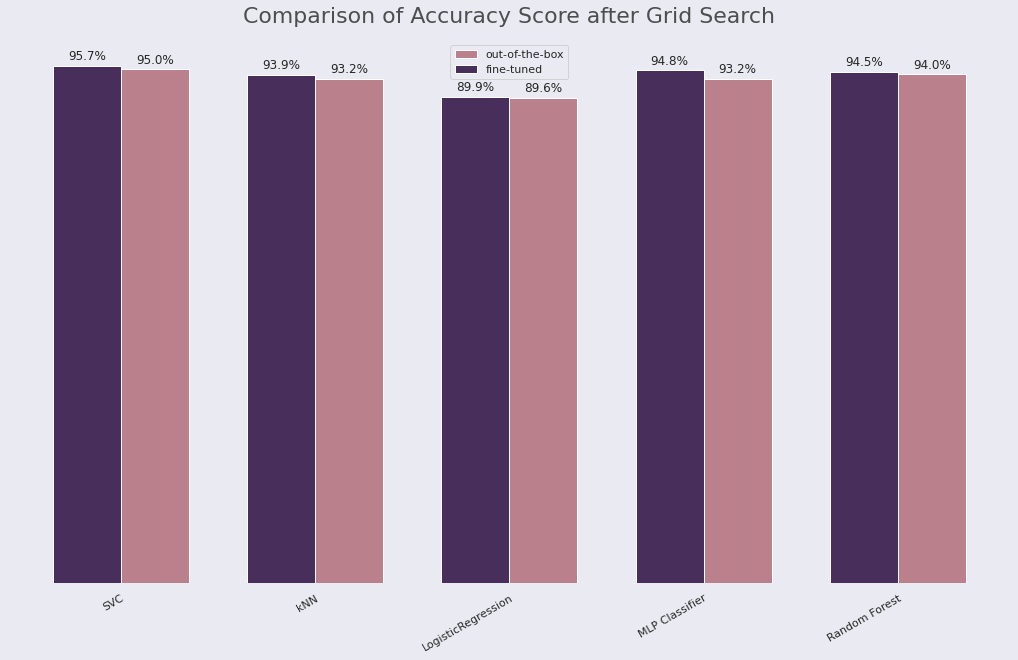

In [94]:
fig = plt.figure(figsize=(18,10))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()
width = 0.35

rects1 = ax.bar(df_acc.index, df_acc['Accuracy'], width,align='edge', color = '#BA818C', label='out-of-the-box')
rects2 = ax.bar(df_acc.index, df_acc['Accuracy (Fine-Tuned)'], -width, align='edge', color = '#482F5B', label='fine-tuned')

for r1, r2 in zip(rects1.patches, rects2.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()

    percent1 = h1*100
    percent2 = h2*100

    ax.annotate('{:.1f}%'.format(percent1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('{:.1f}%'.format(percent2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate the X labels (models' names)
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')
plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks

# creating a title
plt.title('Comparison of Accuracy Score after Grid Search',
          size=22, alpha=0.8, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend()

# saves the plot
plt.savefig("Accuracy-test-ft.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();